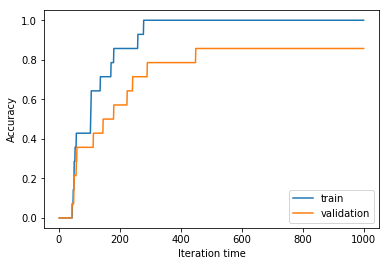

In [3]:
import numpy as np
from numpy import *
import sklearn 
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#read dataset
X,y = load_svmlight_file("Australian.txt")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 45)

X_train = X_train.toarray()
X_test = X_test.toarray()

y_train = y_train
y_test = y_test

#parameters
n = X_train.shape[1]
w = mat(zeros((n,1)))
b = 0
c = 0.9
nita = 0.005

#if the matrix contains only one element,get it as a number
def ele(t):
    return np.array(t)[0]

#gradient function
def gw(X,y,i):
    if 1-y[i]*(ele(w.T*matrix(X[i]).T)+b) >= 0:
        return -y[i]*matrix(X[i]).T
    else:
        return mat(zeros((n,1)))

def gb(X,y,i):
    if 1-y[i]*(ele(w.T*matrix(X[i]).T)+b) >= 0:
        return -y[i]
    else :
        return 0

def gradw(X,y):
    t = mat(zeros((n,1)))
    for i in range(n):
        t += gw(X,y,i)
    t *= c
    return w+t

def gradb(X,y):
    t = 0
    for i in range(n):
        t += gb(X,y,i)
    t *= c
    return t

def accur(X,y):
    t = 0
    for i in range(X.shape[1]):
        if y[i]*(ele(w.T*matrix(X[i]).T)+b) >= 0.7:
            t += 1
    return t/X.shape[1]

iter_cnt = 0
iter_time = 1000

train_x = []
train_y = []

test_x = []
test_y = []

#gradient descent
while iter_cnt < iter_time:
    iter_cnt += 1
    w += nita*(-gradw(X_train,y_train)/n);
    b += nita*(-gradb(X_train,y_train)/n);
    
    train_x.append(iter_cnt)
    train_y.append(accur(X_train,y_train))
    test_x.append(iter_cnt)
    test_y.append(accur(X_test,y_test))

#plot
plt.plot(train_x,train_y,label = "train")
plt.plot(test_x,test_y,label = "validation")
plt.legend(loc = 'lower right')

plt.xlabel("Iteration time")
plt.ylabel("Accuracy")

plt.show()

